In [1]:
import pandas as pd
import numpy as np
import os








In [21]:
# Read in the data for Atlanta Hawks as an example, specifying that the column names are in row 2
atl_data = pd.read_excel('../data/raw/nba_schedule/Atl.xlsx', header=1)

# Display basic information about the dataset
print("Dataset Info:")
print(atl_data.info())

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(atl_data.head())

# Display column names
print("\nColumn names:")
print(atl_data.columns)

# Display basic statistics of numerical columns
print("\nBasic statistics of numerical columns:")
print(atl_data.describe())

# Check for missing values
print("\nMissing values:")
print(atl_data.isnull().sum())

# Display unique values in categorical columns (if any)
categorical_columns = atl_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(atl_data[col].unique())

# This will give us a good overview of the data structure and content,
# helping us identify any necessary data wrangling steps.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        0 non-null      float64       
 1   COMPETITION       80 non-null     object        
 2   GAME 
#           80 non-null     int64         
 3   GAME
DATE         80 non-null     datetime64[ns]
 4   EASTERN 
TIME     80 non-null     object        
 5   LOCAL 
TIME       80 non-null     object        
 6   VENUE
(R/H)       80 non-null     object        
 7   OPPONENT          80 non-null     object        
 8   OWN 
REST         80 non-null     object        
 9   OPPONENT
REST     80 non-null     object        
 10  TOURNAMENT GROUP  80 non-null     object        
 11  ARENA             80 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 7.6+ KB
None

First few rows of the dataset:
   Unname

In [44]:
# Create a function to process a single team's schedule
def process_team_schedule(file_path):
    team_data = pd.read_excel(file_path, header=1, engine='openpyxl')
    team_name = os.path.splitext(os.path.basename(file_path))[0]
    # Check if 'GAME\nDATE' column exists, if not, try 'GAME DATE'
    date_column = 'GAME\nDATE' if 'GAME\nDATE' in team_data.columns else 'GAME DATE'
    return team_name, team_data[date_column]

# Get all Excel files in the directory
schedule_dir = '../data/raw/nba_schedule/'
schedule_files = [f for f in os.listdir(schedule_dir) if f.endswith('.xlsx') and not f.startswith('~$')]

# Process all team schedules
team_schedules = []
for file in schedule_files:
    if file != '2024-2025_NBA_Regular_Season_Original_Schedule.xlsx':
        team_schedules.append(process_team_schedule(os.path.join(schedule_dir, file)))

# Create a date range for the entire season
season_start = min(schedule.min() for _, schedule in team_schedules)
season_end = max(schedule.max() for _, schedule in team_schedules)
all_dates = pd.date_range(start=season_start, end=season_end)

# Create the game schedule matrix
game_schedule = pd.DataFrame(columns=['team_name'] + list(all_dates))

# Fill the matrix with 1s for game days, 0s for non-game days
for team, schedule in team_schedules:
    row = pd.Series(0, index=game_schedule.columns)
    row['team_name'] = team
    row[schedule] = 1
    game_schedule = pd.concat([game_schedule, row.to_frame().T], ignore_index=True)

# Convert to int for cleaner display
game_schedule.iloc[:, 1:] = game_schedule.iloc[:, 1:].astype(int)

# Display the first few rows and columns of the game schedule
print(game_schedule.iloc[:5, :10])


  team_name 2024-10-22 00:00:00 2024-10-23 00:00:00 2024-10-24 00:00:00  \
0       Sac                   0                   0                   1   
1       Gol                   0                   1                   0   
2       Nyk                   1                   0                   0   
3       Cha                   0                   1                   0   
4       San                   0                   0                   1   

  2024-10-25 00:00:00 2024-10-26 00:00:00 2024-10-27 00:00:00  \
0                   0                   1                   0   
1                   1                   0                   1   
2                   1                   0                   0   
3                   1                   1                   0   
4                   0                   1                   0   

  2024-10-28 00:00:00 2024-10-29 00:00:00 2024-10-30 00:00:00  
0                   1                   1                   0  
1                   0         

In [45]:
game_schedule.columns

Index([        'team_name', 2024-10-22 00:00:00, 2024-10-23 00:00:00,
       2024-10-24 00:00:00, 2024-10-25 00:00:00, 2024-10-26 00:00:00,
       2024-10-27 00:00:00, 2024-10-28 00:00:00, 2024-10-29 00:00:00,
       2024-10-30 00:00:00,
       ...
       2025-04-04 00:00:00, 2025-04-05 00:00:00, 2025-04-06 00:00:00,
       2025-04-07 00:00:00, 2025-04-08 00:00:00, 2025-04-09 00:00:00,
       2025-04-10 00:00:00, 2025-04-11 00:00:00, 2025-04-12 00:00:00,
       2025-04-13 00:00:00],
      dtype='object', length=175)

In [46]:
# Create a dictionary to map current team names to desired team names
team_name_mapping = {
    'Sac': 'SAC',
    'Gol': 'GS',
    'Nyk': 'NY',
    'Cha': 'CHA',
    'San': 'SA',
    'Pho': 'PHO',
    'Lal': 'LAL',
    'Bro': 'BKN',
    'Atl': 'ATL',
    'Mia': 'MIA',
    'Det': 'DET',
    'Dal': 'DAL',
    'Orl': 'ORL',
    'Uta': 'UTA',
    'Mil': 'MIL',
    'Phi': 'PHI',
    'Cle': 'CLE',
    'Nor': 'NO',
    'Chi': 'CHI',
    'Den': 'DEN',
    'Mem': 'MEM',
    'Tor': 'TOR',
    'Bos': 'BOS',
    'Min': 'MIN',
    'Hou': 'HOU',
    'Okc': 'OKC',
    'Por': 'POR',
    'Was': 'WAS',
    'Lac': 'LAC',
    'Ind': 'IND'
}

# Apply the mapping to the 'team_name' column
game_schedule['team_name'] = game_schedule['team_name'].map(team_name_mapping)

# Verify the changes
print(game_schedule['team_name'].unique())

# Check if there are any NaN values after mapping
if game_schedule['team_name'].isna().any():
    print("There are still some unmapped team names:")
    print(game_schedule[game_schedule['team_name'].isna()]['team_name'].unique())
else:
    print("All team names have been successfully mapped.")

# We're not setting 'team_name' as the index, so we'll keep it as its own column


['SAC' 'GS' 'NY' 'CHA' 'SA' 'PHO' 'LAL' 'BKN' 'ATL' 'MIA' 'DET' 'DAL'
 'ORL' 'UTA' 'MIL' 'PHI' 'CLE' 'NO' 'CHI' 'DEN' 'MEM' 'TOR' 'BOS' 'MIN'
 'HOU' 'OKC' 'POR' 'WAS' 'LAC' 'IND']
All team names have been successfully mapped.


In [48]:
game_schedule.columns

Index([        'team_name', 2024-10-22 00:00:00, 2024-10-23 00:00:00,
       2024-10-24 00:00:00, 2024-10-25 00:00:00, 2024-10-26 00:00:00,
       2024-10-27 00:00:00, 2024-10-28 00:00:00, 2024-10-29 00:00:00,
       2024-10-30 00:00:00,
       ...
       2025-04-04 00:00:00, 2025-04-05 00:00:00, 2025-04-06 00:00:00,
       2025-04-07 00:00:00, 2025-04-08 00:00:00, 2025-04-09 00:00:00,
       2025-04-10 00:00:00, 2025-04-11 00:00:00, 2025-04-12 00:00:00,
       2025-04-13 00:00:00],
      dtype='object', length=175)

In [49]:
# Save the game schedule to a CSV file
game_schedule.to_csv('../data/processed/nba_game_schedule.csv', index=False)
print("Game schedule saved to '../data/processed/nba_game_schedule.csv'")

Game schedule saved to '../data/processed/nba_game_schedule.csv'


Top 10 busiest days:
2025-04-13    30
2024-11-04    30
2025-04-11    30
2025-02-12    30
2024-12-23    28
2025-01-25    28
2024-11-27    28
2024-11-08    26
2024-12-19    26
2024-12-08    24
dtype: int64


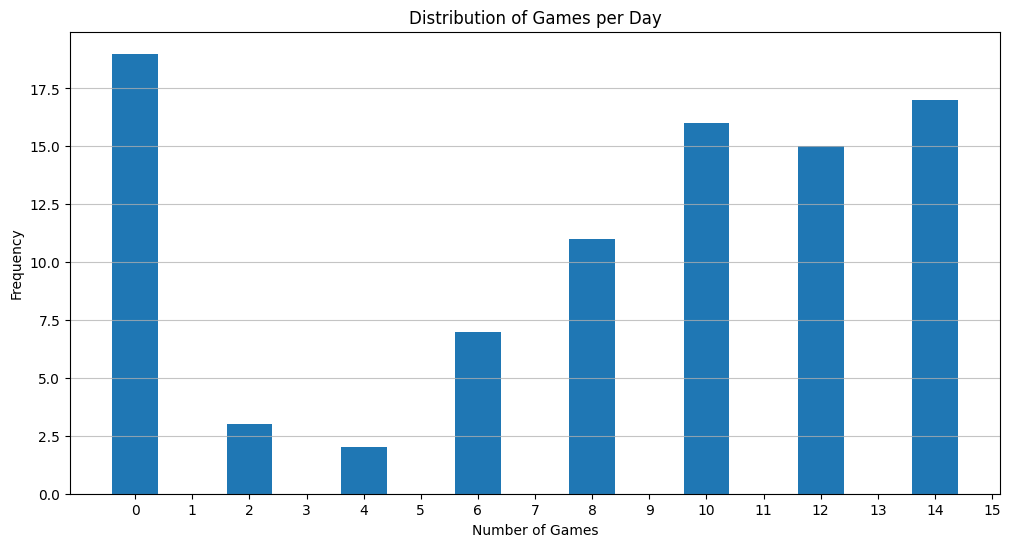


Games per day statistics:
Average games per day: 13.79
Median games per day: 14.00
Maximum games in a day: 30
Minimum games in a day: 0


In [14]:
# Calculate the number of games for each day
games_per_day = game_schedule.sum()

# Sort the days by number of games in descending order
busiest_days = games_per_day.sort_values(ascending=False)

# Display the top 10 busiest days
print("Top 10 busiest days:")
print(busiest_days.head(10))

# Create a histogram of games per day
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(games_per_day, bins=range(0, 16), align='left', rwidth=0.8)
plt.title('Distribution of Games per Day')
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.xticks(range(0, 16))
plt.grid(axis='y', alpha=0.75)
plt.show()

# Calculate and display some statistics
print("\nGames per day statistics:")
print(f"Average games per day: {games_per_day.mean():.2f}")
print(f"Median games per day: {games_per_day.median():.2f}")
print(f"Maximum games in a day: {games_per_day.max()}")
print(f"Minimum games in a day: {games_per_day.min()}")
